In [2]:
# —Ç–µ–º–∞ –ø—Ä–æ–µ–∫—Ç–∞ "–†–∞–∑–≤–∏—Ç–∏–µ —Ö–∏–ø-—Ö–æ–ø –∫—É–ª—å—Ç—É—Ä—ã –≤ —Ä–µ—Å–ø—É–±–ª–∏–∫–µ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω –∏ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏"

In [3]:
import vk  

In [4]:
token = "30dbd33230dbd33230dbd3324830a82cb6330db30dbd3326fbe2a0603563e0f72a6e9c2" 
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [5]:
personal_token = "e040ad8f8c95173eae22ea6ac92021cca459e27a16cd730e0b5d11d96d159f0c42f9ce603c04c80f369de"
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [6]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [7]:
members = get_members ("aigelmusic")

In [8]:
aigelmusic_members = get_members ("aigelmusic")
len(aigelmusic_members)

35617

In [9]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [10]:
save_members_to_file ("aigelmusic_savemembers.tsv", members)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd

df = pd.read_csv("aigelmusic_savemembers.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [13]:
df.head(10)

id       name        surname sex birth              city  country
0    364,     Albert  Alexandrovich   M     -  Saint Petersburg   Russia
1    636,  Alexander        Belyaev   M  1989           Pushkin   Russia
2   2950,    Evgenya      Kovalchuk   F     -                 -        -
3   5674,      Vasya       Ugryumov   M     -  Saint Petersburg   Russia
4   6873,      Yulia      Krishneva   F     -                 -        -
5   8001,       Inga        Petrova   F     -              K√∂ln  Germany
6   9968,      Denis        Morozov   M     -  Saint Petersburg   Russia
7  10254,    DELETED            NaN   M     -                 -        -
8  11345,      Maxim       Stepakov   M     -            Moscow   Russia
9  11782,      Alisa         Kobzun   F     -  Saint Petersburg   Russia

In [14]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

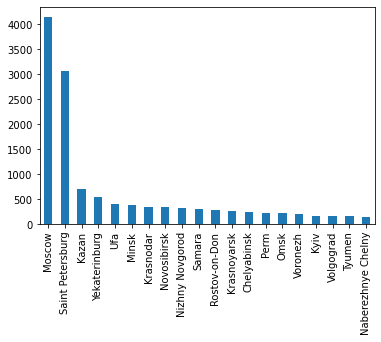

In [15]:
city_count.plot.bar() 
plt.show() 

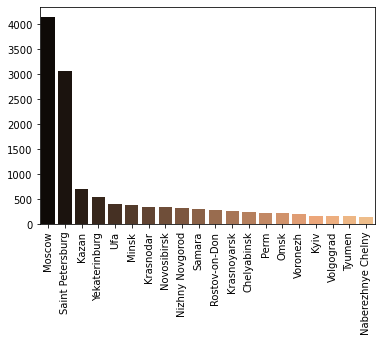

In [16]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.xticks(rotation=90) 
plt.show() 

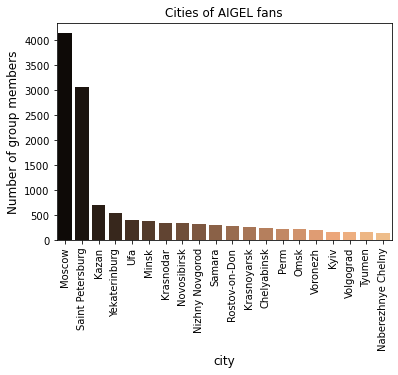

In [17]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of AIGEL fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

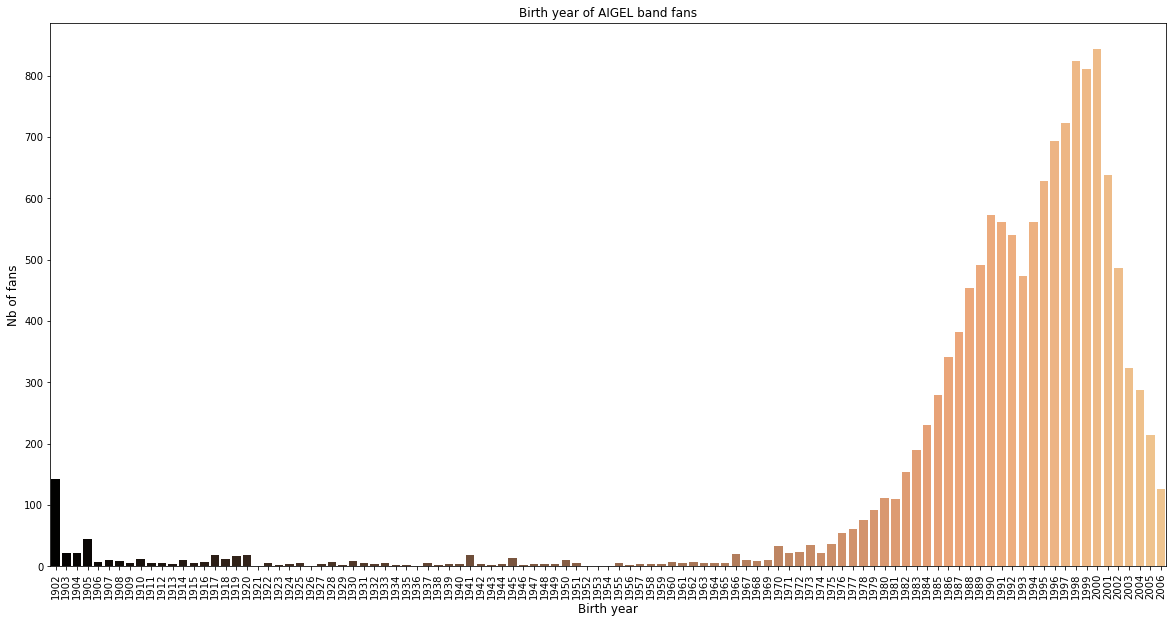

In [18]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of AIGEL band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

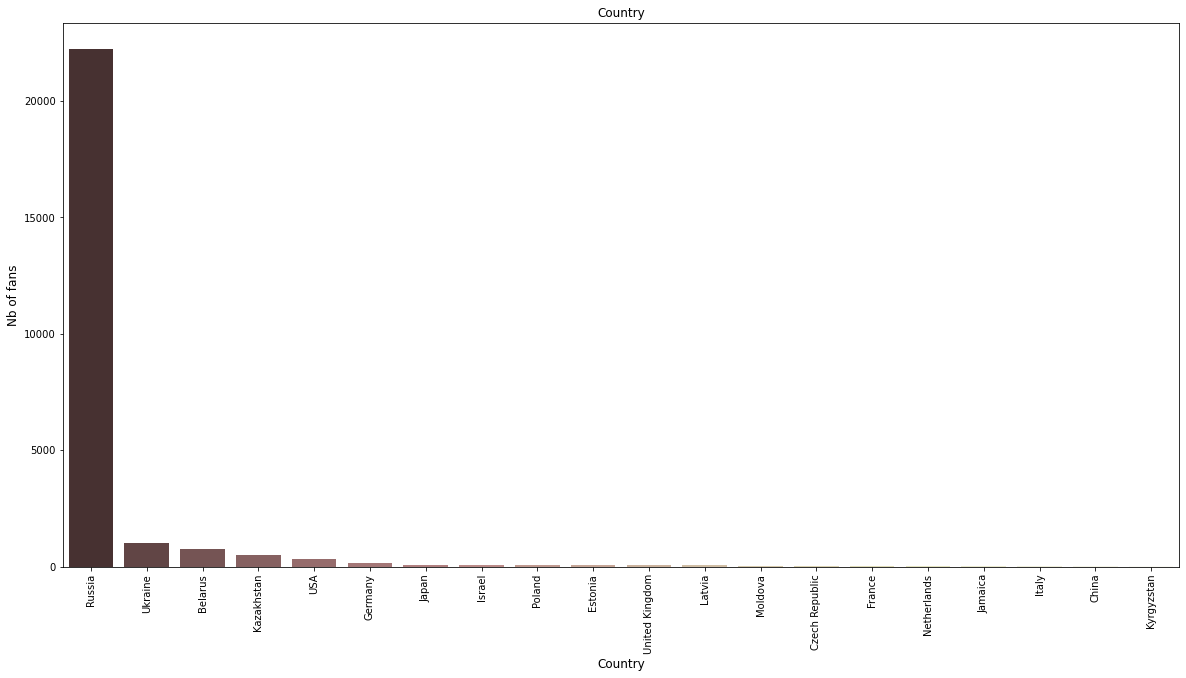

In [19]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Country")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"

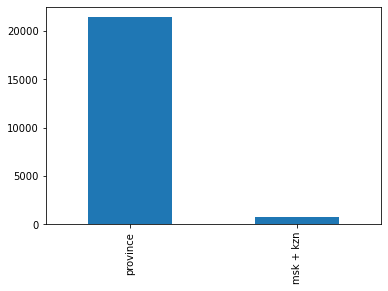

In [26]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 
axes = city_count.plot.bar() 

In [20]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

<ipython-input-20-4f4bd87b4777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce')


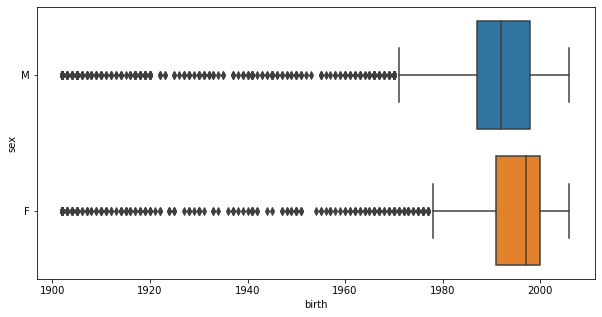

In [21]:
plt.figure(figsize=(10,5)) 
sns.boxplot(x="birth", y="sex", data=new_df) 
plt.show()

In [27]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [28]:
aigelmusic_posts=get_posts("aigelmusic")

In [29]:
for post in aigelmusic_posts[:10]:
    print (post)

–ü—Ä–µ–º—å–µ—Ä–∞!
–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª 

–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/

Mastered: [id52310062|Aleks]
Design: [id80170169|Max Kuzhegetov]

–°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ [id80170169|–ú–∞–∫—Å–∞ –ö—É–∂–µ–≥–µ—Ç–æ–≤–∞]!

–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!

–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§
–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§
–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. 

‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞
‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ DOX –≤ Facebook, –ø–

In [30]:
print (aigelmusic_posts)

['–ü—Ä–µ–º—å–µ—Ä–∞!\n–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª \n\n–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/\n\nMastered: [id52310062|Aleks]\nDesign: [id80170169|Max Kuzhegetov]', '', '–°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ [id80170169|–ú–∞–∫—Å–∞ –ö—É–∂–µ–≥–µ—Ç–æ–≤–∞]!\n\n–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!\n\n–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§', '–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§', '–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. \n\n‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞\n‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω

In [32]:
def save_posts_to_file(filename, post):
    with open(filename, "w", encoding="utf-8") as f:
        for post_name, group_id in posts:
            f.write(f"{post_name}\t{group_id}\n")

In [35]:
save_post_to_file("aigelmusic_posts.tsv", posts)

NameError: name 'savepost_to_file' is not defined

In [40]:
!pip install natasha

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=08d9efa84a139152fb4b7f1304045929715a37e76bc9d1aeb9eb8f493eb44e02
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [43]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding,
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [44]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb=NewsEmbedding()
morph_tagger=NewsMorphTagger(emb)
syntax_parser=NewsSyntaxParser(emb)
ner_tagger=NewsNERTagger(emb)
names_extractor=NamesExtractor(morph_vocab)